<a href="https://colab.research.google.com/github/Ayush310803/ViT/blob/main/Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install tensorflow numpy opencv-python

In [50]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from PIL import Image

def encoder_block(inputs, num_filters):
    """ Convolutional block with two Conv2D layers followed by ReLU and MaxPooling """
    x = tf.keras.layers.Conv2D(num_filters, 3, padding='valid')(inputs)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(num_filters, 3, padding='valid')(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)
    return x

In [51]:
def decoder_block(inputs, skip_features, num_filters):
    x = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding='same')(inputs)

    skip_features = tf.keras.layers.Resizing(x.shape[1], x.shape[2])(skip_features)

    x = tf.keras.layers.Concatenate()([x, skip_features])
    x = tf.keras.layers.Conv2D(num_filters, 3, padding='same')(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(num_filters, 3, padding='same')(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [52]:
def unet_model(input_shape=(256, 256, 3), num_classes=1):
    inputs = tf.keras.layers.Input(input_shape)

    s1 = encoder_block(inputs, 64)
    s2 = encoder_block(s1, 128)
    s3 = encoder_block(s2, 256)
    s4 = encoder_block(s3, 512)

    b1 = tf.keras.layers.Conv2D(1024, 3, padding='valid')(s4)
    b1 = tf.keras.layers.Activation('relu')(b1)
    b1 = tf.keras.layers.Conv2D(1024, 3, padding='valid')(b1)
    b1 = tf.keras.layers.Activation('relu')(b1)

    s5 = decoder_block(b1, s4, 512)
    s6 = decoder_block(s5, s3, 256)
    s7 = decoder_block(s6, s2, 128)
    s8 = decoder_block(s7, s1, 64)
    outputs = tf.keras.layers.Conv2D(num_classes, 1, activation='sigmoid', padding='valid')(s8)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='U-Net')
    return model

In [53]:
if __name__ == '__main__':
    model = unet_model(input_shape=(572, 572, 3), num_classes=2)
    model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 572, 572, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_240 (Conv2D)       │ (None, 570, 570, 64)   │          1,792 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_220            │ (None, 570, 570, 64)   │              0 │ conv2d_240[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_241 (Conv2D)       │ (None, 568, 568, 64)   │         36,928 │ activation_220[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_221            │ (None, 568, 568, 64)   │              0 │ conv2d_241[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_60          │ (None, 284, 284, 64)   │              0 │ activation_221[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_242 (Conv2D)       │ (None, 282, 282, 128)  │         73,856 │ max_pooling2d_60[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_222            │ (None, 282, 282, 128)  │              0 │ conv2d_242[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_243 (Conv2D)       │ (None, 280, 280, 128)  │        147,584 │ activation_222[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_223            │ (None, 280, 280, 128)  │              0 │ conv2d_243[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_61          │ (None, 140, 140, 128)  │              0 │ activation_223[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_244 (Conv2D)       │ (None, 138, 138, 256)  │        295,168 │ max_pooling2d_61[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_224            │ (None, 138, 138, 256)  │              0 │ conv2d_244[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_245 (Conv2D)       │ (None, 136, 136, 256)  │        590,080 │ activation_224[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_225            │ (None, 136, 136, 256)  │              0 │ conv2d_245[0][0]       │
│ (Activation)              │                        │                │                        │
├──────────────────────

 Total params: 31,031,810 (118.38 MB)

 Trainable params: 31,031,810 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


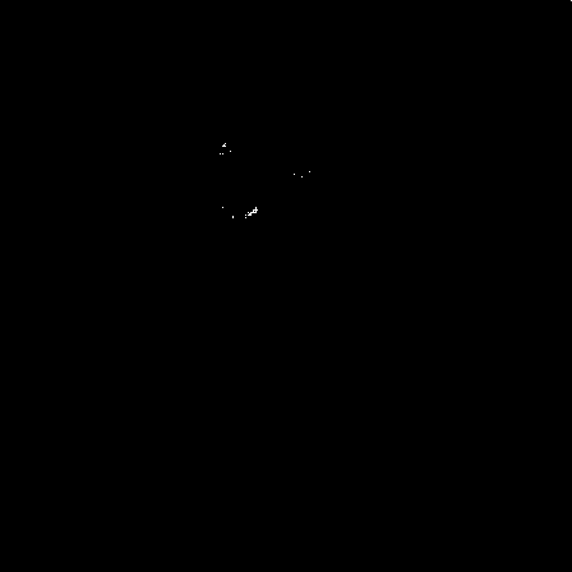

In [54]:
img = Image.open('/content/download.jpeg')
img = img.resize((572, 572))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array[:,:,:3], axis=0)
img_array = img_array / 255.

model = unet_model(input_shape=(572, 572, 3), num_classes=2)
predictions = model.predict(img_array)
predictions = np.squeeze(predictions, axis=0)
predictions = np.argmax(predictions, axis=-1)
predictions = Image.fromarray(np.uint8(predictions*255))
predictions = predictions.resize((img.width, img.height))
predictions.save('predicted_image.jpg')
predictions